## DATA 644 (Bayesian Reasoning in Data Science): Assignment 1

In [ ]:
%pip install pymc pytensor

In [ ]:
%matplotlib inline
import warnings

import arviz as az
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
#import theano.tensor as tt

from pymc import Model, Normal, Slice, sample, HalfNormal
from pymc.distributions import Interpolated
from scipy import stats
#from theano import as_op

import pickle

In [ ]:
from google.colab import files
import pickle

uploaded = files.upload()


Saving my_arrays.pkl to my_arrays.pkl


In [ ]:
with open("my_arrays.pkl", 'rb') as file:
    data = pickle.load(file)

In [ ]:
import numpy as np
np.shape(data['X1'])

(1000,)

In [ ]:
X1 = data['X1']
X2 = data['X2']
Y = data['Y']

### Visual inspection

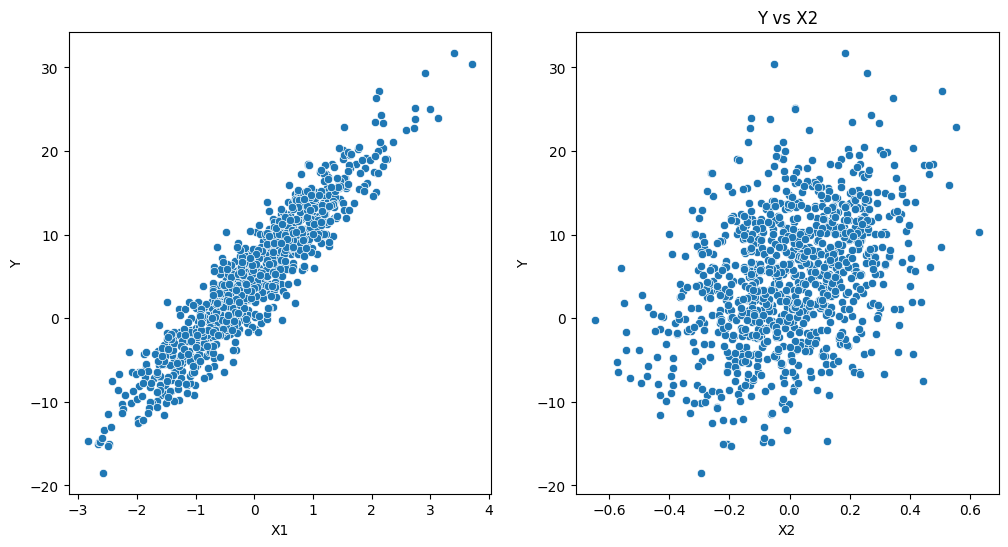

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 3.081e+04
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:21:11   Log-Likelihood:                -1395.6
No. Observations:                1000   AIC:                             2797.
Df Residuals:                     997   BIC:                             2812.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0115      0.031    161.944      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns


# Create a DataFrame from the arrays
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'Y': Y
})

# Prepare the features and target variable
X = data[['X1', 'X2']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
Y = data['Y']


# Visualization
plt.figure(figsize=(12, 6))

# Plot Y vs X1
plt.subplot(1, 2, 1)
sns.scatterplot(x='X1', y='Y', data=data)


# Plot Y vs X2
plt.subplot(1, 2, 2)
sns.scatterplot(x='X2', y='Y', data=data)

plt.title('Y vs X2')

plt.show()


#---- you can also do a linear fit, etc. (complete)

# Perform linear regression
model = sm.OLS(Y, X).fit()

# Print the summary to inspect the coefficients and model performance
print(model.summary())


### Building the Model


In [ ]:
basic_model = Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = Normal("alpha", mu=0, sigma=10)
    beta0 = Normal("beta0", mu=0, sigma=10)
    beta1 = Normal("beta1", mu=0, sigma=10)
    sigma = HalfNormal("sigma",sigma=5)


    # Expected value of outcome
    mu = alpha + beta0 * X1 + beta1 * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

    # draw 1000 posterior samples
    trace_in = sample(5000)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta0'}>,
       <Axes: title={'center': 'beta1'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

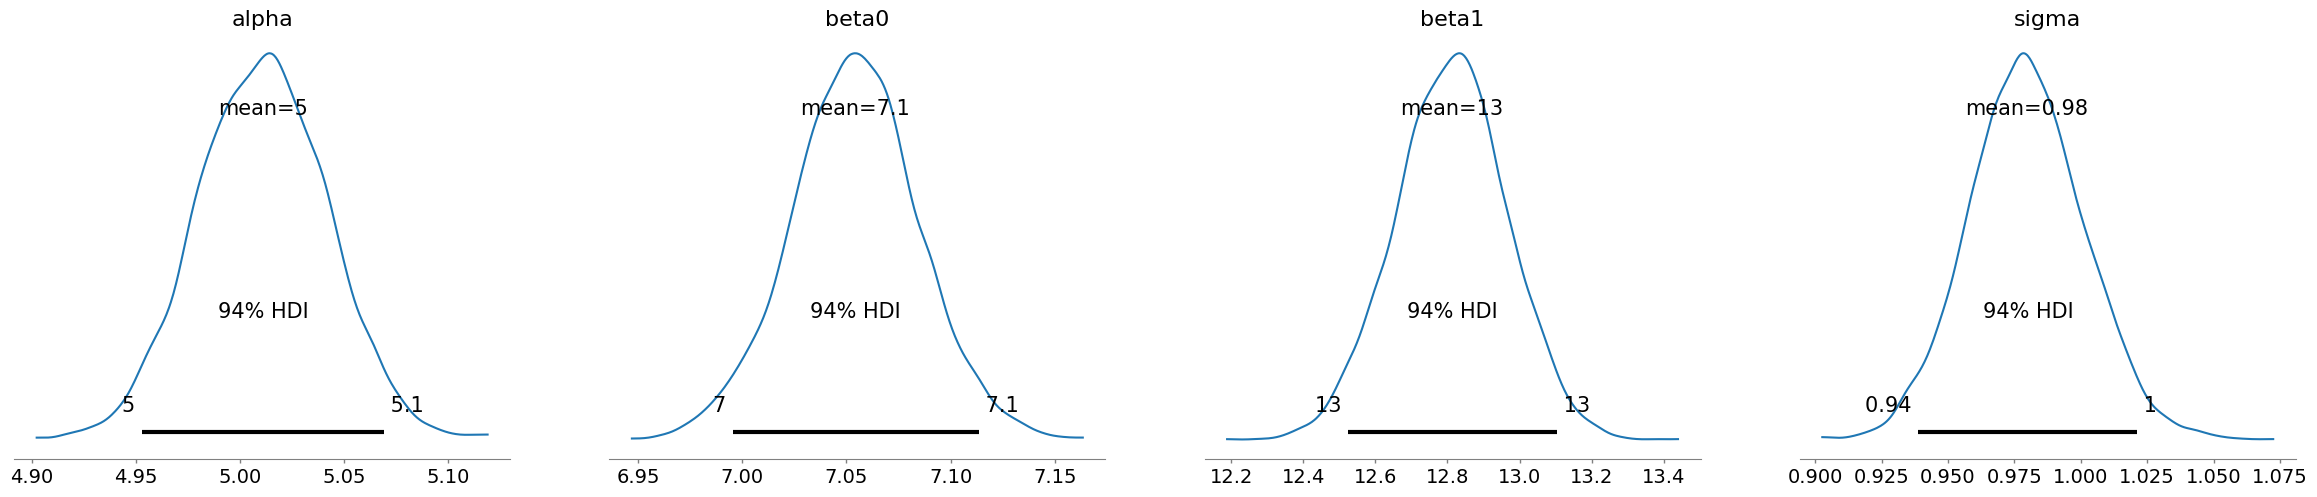

In [ ]:
az.plot_posterior(trace_in)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

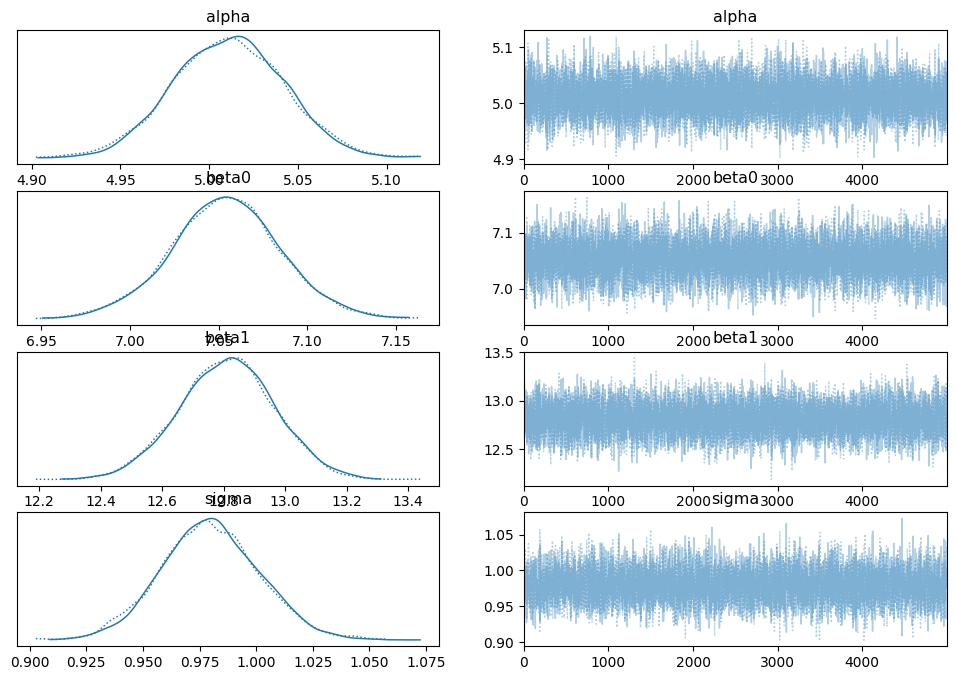

In [ ]:
az.plot_trace(trace_in, compact=True)


In [ ]:
np.shape(X1)

(1000,)

(array([ 18.,  55., 122., 230., 248., 194.,  95.,  29.,   6.,   3.]),
 array([-2.83591463, -2.18122708, -1.52653953, -0.87185197, -0.21716442,
         0.43752313,  1.09221068,  1.74689823,  2.40158578,  3.05627333,
         3.71096089]),
 <BarContainer object of 10 artists>)

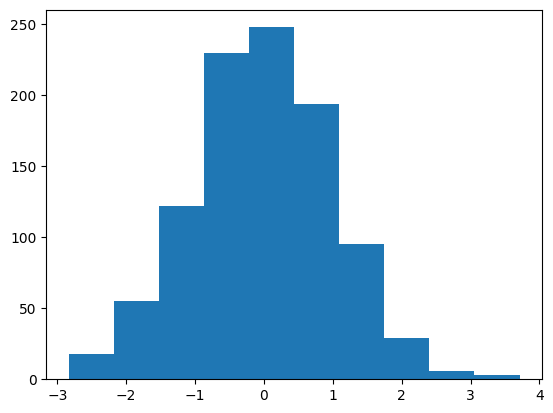

In [ ]:
plt.hist(X1)

In [ ]:
az.summary(trace_in,hdi_prob=0.94)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,5.011,0.031,4.953,5.069,0.000,0.000,17161.0,7772.0,1.0
beta0,7.054,0.031,6.995,7.114,0.000,0.000,15873.0,8126.0,1.0
beta1,12.811,0.154,12.525,13.103,0.001,0.001,14779.0,8785.0,1.0
sigma,0.980,0.022,0.939,1.021,0.000,0.000,11961.0,8264.0,1.0


### What happens if using 10 observations only?

In [ ]:
# Generate 10 random unique indices from the range of your data length
random_indices = np.random.choice(len(X1), 10, replace=False)


# Select the corresponding elements from X1, X2, and Y
selected_X1 = X1[random_indices]
selected_X2 = X2[random_indices]
selected_Y = Y.values[random_indices]


In [ ]:
selected_model = Model()

with selected_model:
    # Priors for unknown model parameters
    alpha = Normal("alpha", mu=0, sigma=10)
    beta0 = Normal("beta0", mu=0, sigma=10)
    beta1 = Normal("beta1", mu=0, sigma=10)
    sigma = HalfNormal("sigma",sigma=5)


    # Expected value of outcome
    mu = alpha + beta0 * selected_X1 + beta1 * selected_X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal("Y_obs", mu=mu, sigma=sigma, observed=selected_Y)

    # draw 1000 posterior samples
    trace_selected = sample(5000)

array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta0'}>,
       <Axes: title={'center': 'beta1'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

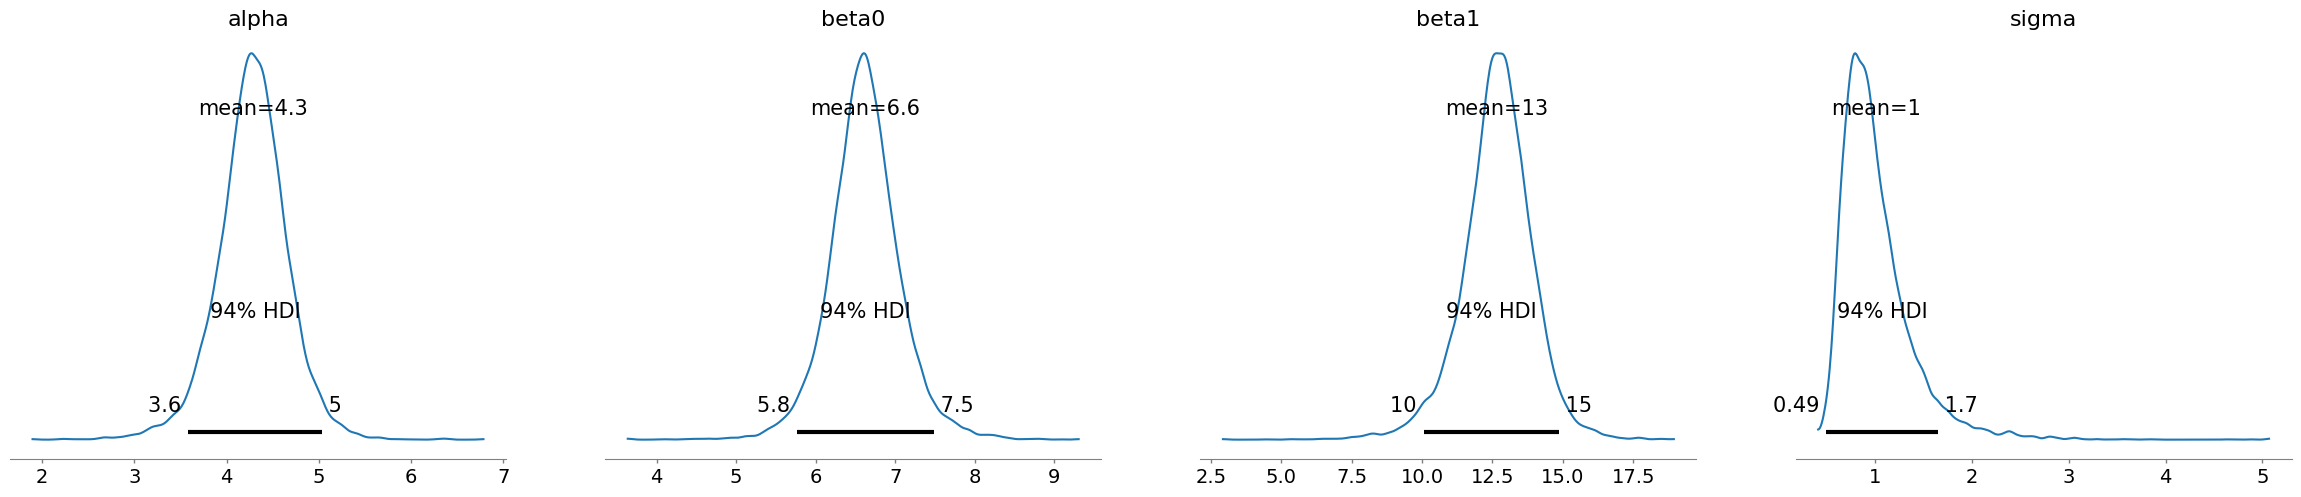

In [ ]:
az.plot_posterior(trace_selected)

In [ ]:
az.summary(trace_selected,hdi_prob=0.94)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,4.283,0.385,3.581,5.033,0.005,0.004,6071.0,4790.0,1.0
beta0,6.620,0.453,5.761,7.487,0.006,0.004,6391.0,4463.0,1.0
beta1,12.654,1.270,10.052,14.876,0.017,0.012,5998.0,4707.0,1.0
sigma,1.006,0.370,0.493,1.653,0.006,0.004,3700.0,4565.0,1.0


The HDI intervals become broader, highlighting more uncertainty (less observations means less information we could leverage on in our model)